# Kwok prediction analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_pred = pd.read_hdf('../results/pred_kwok.h5', 'pred_kwok')

In [5]:
df_pred.sort_values(['real','image','patch']).head()

path  image  patch    pred  \
1676  data/patches_part A/train/Benign/b001patch1.tif      1      1  Normal   
1677  data/patches_part A/train/Benign/b001patch2.tif      1      2  Normal   
1666  data/patches_part A/train/Benign/b001patch3.tif      1      3  Normal   
1667  data/patches_part A/train/Benign/b001patch4.tif      1      4  Normal   
1671  data/patches_part A/train/Benign/b001patch5.tif      1      5  Normal   

      pred_benign  pred_normal  pred_insitu  pred_invasive    real  
1676     0.339243     0.660458     0.000150       0.000149  Benign  
1677     0.254288     0.745229     0.000187       0.000296  Benign  
1666     0.176514     0.822981     0.000223       0.000281  Benign  
1667     0.159773     0.839686     0.000266       0.000274  Benign  
1671     0.183823     0.815072     0.000505       0.000600  Benign

In [6]:
(df_pred.real == df_pred.pred).mean()

0.8549603174603174

In [7]:
df_pred['confidence'] = np.max(df_pred[['pred_benign','pred_normal','pred_insitu','pred_invasive']].values, axis=1)

In [8]:
dfs = [group[1] for group in df_pred.groupby('real')]

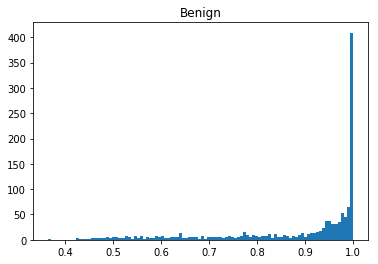

In [9]:
plt.figure()
ax = plt.hist(dfs[0].confidence, bins=100)
plt.title(dfs[0].real.iloc[0])
plt.show()

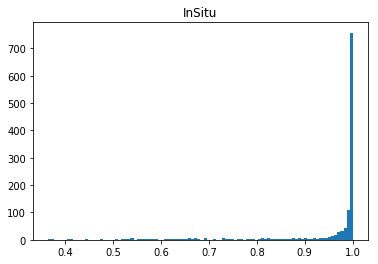

In [10]:
plt.figure()
ax = plt.hist(dfs[1].confidence, bins=100)
plt.title(dfs[1].real.iloc[0])
plt.show()

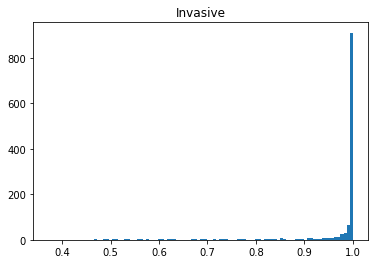

In [11]:
plt.figure()
ax = plt.hist(dfs[2].confidence, bins=100)
plt.title(dfs[2].real.iloc[0])
plt.show()

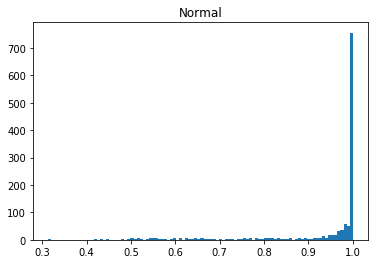

In [12]:
plt.figure()
ax = plt.hist(dfs[3].confidence, bins=100)
plt.title(dfs[3].real.iloc[0])
plt.show()

In [13]:
df_pred['correct'] = df_pred.real == df_pred.pred
df_pred.groupby('real').correct.mean()

real
Benign      0.776984
InSitu      0.885714
Invasive    0.917460
Normal      0.839683
Name: correct, dtype: float64

In [14]:
df_pred['conf_bin'] = np.round(df_pred.confidence,2)

In [16]:
df_conf = df_pred.groupby('conf_bin').correct.agg(['mean','count'])
df_conf.tail()

mean  count
conf_bin                 
0.96      0.846154    104
0.97      0.858025    162
0.98      0.886179    246
0.99      0.974576    472
1.00      0.968301   2713

In [17]:
df_conf.loc[df_conf.index < 0.99, 'count'].sum()

1855

In [18]:
df_pred.loc[df_pred.confidence > 0.9].groupby('real').correct.mean()

real
Benign      0.891924
InSitu      0.952107
Invasive    0.970377
Normal      0.933852
Name: correct, dtype: float64

In [21]:
df_pred_fts = pd.read_hdf('../results/pred_kwok_fts.h5', 'pred_kwok_fts')
df_pred_fts.head()


image  patch    pred  confidence_meta    real  confidence  correct
0      3      1  Normal         0.643119  Benign        0.64    False
1      3     10  Benign         0.877821  Benign        0.88     True
2      3     11  Benign         0.852527  Benign        0.85     True
3      3     12  Benign         0.865894  Benign        0.87     True
4      3     13  Benign         0.659764  Benign        0.66     True

In [22]:
df_pred.head()

path  image  patch    pred  \
504   data/patches_part A/train/Benign/b089patch5.tif     89      5  Benign   
505  data/patches_part A/train/Benign/b089patch14.tif     89     14  Benign   
506  data/patches_part A/train/Benign/b089patch13.tif     89     13  Benign   
507  data/patches_part A/train/Benign/b089patch11.tif     89     11  Benign   
508   data/patches_part A/train/Benign/b089patch4.tif     89      4  Benign   

     pred_benign  pred_normal  pred_insitu  pred_invasive    real  confidence  \
504     0.860668     0.061979     0.073181       0.004171  Benign    0.860668   
505     0.920371     0.038582     0.038410       0.002637  Benign    0.920371   
506     0.953537     0.024226     0.020012       0.002225  Benign    0.953537   
507     0.977115     0.017397     0.004774       0.000714  Benign    0.977115   
508     0.978364     0.015683     0.004729       0.001224  Benign    0.978364   

     correct  conf_bin  
504     True      0.86  
505     True      0.92  
506     True      0.95  
507     True      0.98  
508     True      0.98

In [24]:
df_comp = df_pred[['image','patch', 'pred','confidence', 'real']].merge(df_pred_fts[['image','patch', 'pred','confidence_meta', 'real']], on=['image','patch','real'],suffixes=['_Kw','_Kw_ft'])
df_comp.head()

image  patch pred_Kw  confidence    real pred_Kw_ft  confidence_meta
0     89      5  Benign    0.860668  Benign     Benign         0.978784
1     89     14  Benign    0.920371  Benign     Benign         0.981207
2     89     13  Benign    0.953537  Benign     Benign         0.984918
3     89     11  Benign    0.977115  Benign     Benign         0.990553
4     89      4  Benign    0.978364  Benign     Benign         0.989460

# Confidence when Kwok + fts is correct / incorrect

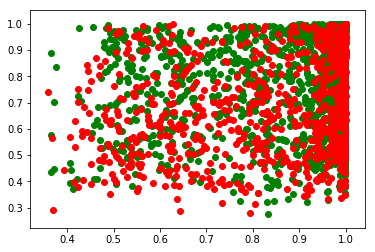

In [25]:
df_kw_ft_correct = df_comp.loc[df_comp.pred_Kw_ft == df_comp.real]
df_kw_ft_incorrect = df_comp.loc[df_comp.pred_Kw_ft != df_comp.real]
plt.scatter(df_kw_ft_correct.confidence, df_kw_ft_correct.confidence_meta, c='green')
plt.scatter(df_kw_ft_incorrect.confidence, df_kw_ft_incorrect.confidence_meta, c='red')
plt.show()

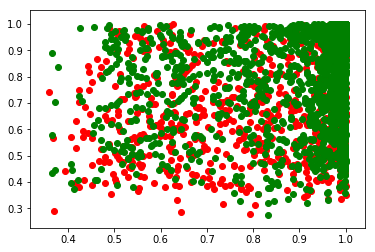

In [26]:
plt.scatter(df_kw_ft_incorrect.confidence, df_kw_ft_incorrect.confidence_meta, c='red')
plt.scatter(df_kw_ft_correct.confidence, df_kw_ft_correct.confidence_meta, c='green')
plt.show()

In [27]:
from scipy.stats import gaussian_kde

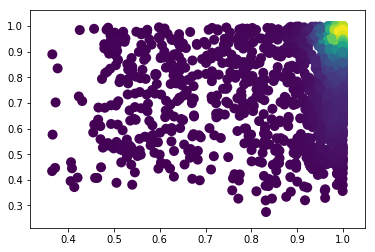

In [28]:
x = df_kw_ft_correct.confidence
y = df_kw_ft_correct.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

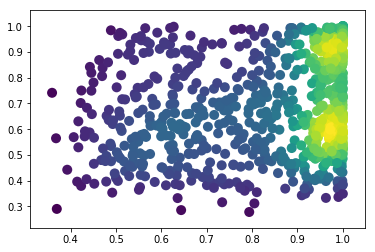

In [29]:
x = df_kw_ft_incorrect.confidence
y = df_kw_ft_incorrect.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

# Confidence when Kowk  is correct / incorrect

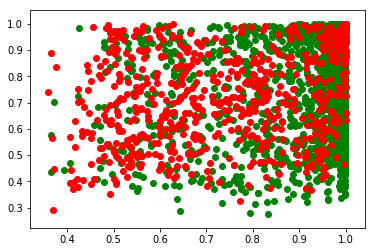

In [30]:
df_kw_correct = df_comp.loc[df_comp.pred_Kw == df_comp.real]
df_kw_incorrect = df_comp.loc[df_comp.pred_Kw != df_comp.real]
plt.scatter(df_kw_correct.confidence, df_kw_correct.confidence_meta, c='green')
plt.scatter(df_kw_incorrect.confidence, df_kw_incorrect.confidence_meta, c='red')
plt.show()

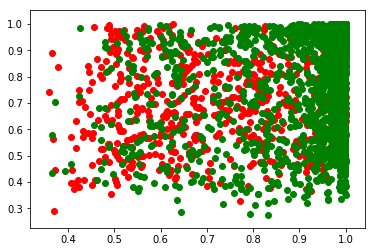

In [31]:
plt.scatter(df_kw_incorrect.confidence, df_kw_incorrect.confidence_meta, c='red')
plt.scatter(df_kw_correct.confidence, df_kw_correct.confidence_meta, c='green')
plt.show()

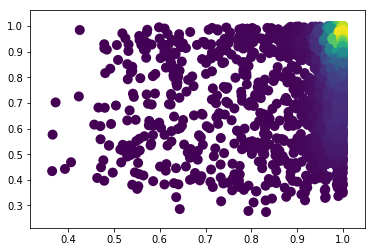

In [32]:
x = df_kw_correct.confidence
y = df_kw_correct.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

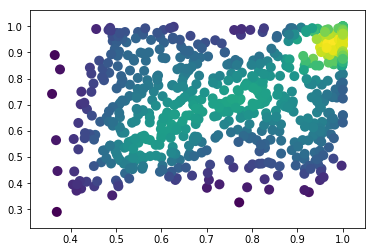

In [33]:
x = df_kw_incorrect.confidence
y = df_kw_incorrect.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

# Confidence when Kwok + fts is correct & Kwok correct

In [34]:
df_kw_ft_correct = df_comp.loc[df_comp.pred_Kw_ft == df_comp.real]
df_kw_ft_correct_kw_correct = df_kw_ft_correct.loc[df_kw_ft_correct.pred_Kw == df_kw_ft_correct.real]

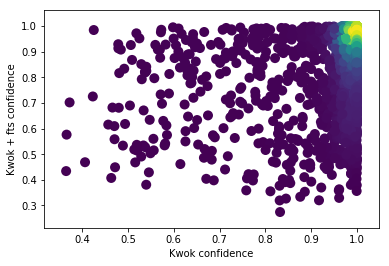

In [35]:
x = df_kw_ft_correct_kw_correct.confidence
y = df_kw_ft_correct_kw_correct.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.xlabel('Kwok confidence')
plt.ylabel('Kwok + fts confidence')
plt.show()

# Confidence when Kwok + fts is correct & Kwok incorrect

In [36]:
df_kw_ft_correct_kw_incorrect = df_kw_ft_correct.loc[df_kw_ft_correct.pred_Kw != df_kw_ft_correct.real]

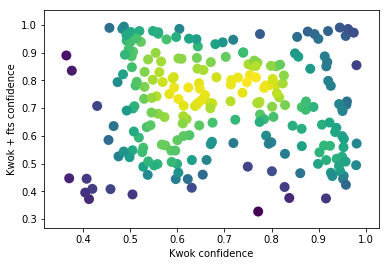

In [37]:
x = df_kw_ft_correct_kw_incorrect.confidence
y = df_kw_ft_correct_kw_incorrect.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.xlabel('Kwok confidence')
plt.ylabel('Kwok + fts confidence')
plt.show()

# Confidence when Kwok + fts is incorrect & Kwok correct

In [38]:
df_kw_ft_incorrect = df_comp.loc[df_comp.pred_Kw_ft != df_comp.real]
df_kw_ft_incorrect_kw_correct = df_kw_ft_incorrect.loc[df_kw_ft_incorrect.pred_Kw == df_kw_ft_incorrect.real]

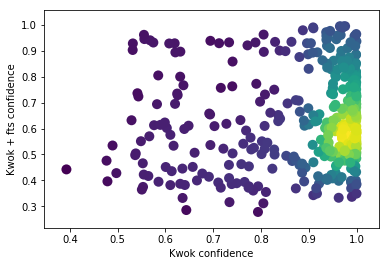

In [39]:
x = df_kw_ft_incorrect_kw_correct.confidence
y = df_kw_ft_incorrect_kw_correct.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.xlabel('Kwok confidence')
plt.ylabel('Kwok + fts confidence')
plt.show()

# Confidence when Kwok + fts is incorrect & Kwok incorrect

In [40]:
df_kw_ft_incorrect = df_comp.loc[df_comp.pred_Kw_ft != df_comp.real]
df_kw_ft_incorrect_kw_incorrect = df_kw_ft_incorrect.loc[df_kw_ft_incorrect.pred_Kw != df_kw_ft_incorrect.real]

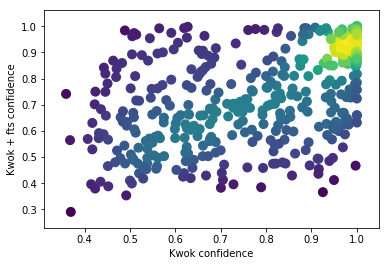

In [41]:
x = df_kw_ft_incorrect_kw_incorrect.confidence
y = df_kw_ft_incorrect_kw_incorrect.confidence_meta
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.xlabel('Kwok confidence')
plt.ylabel('Kwok + fts confidence')
plt.show()

# Test random forest with features

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_predict

In [77]:
df_features = pd.read_csv('data/final_isaac_features.csv', sep=';')
df_features = df_features.rename(columns={'image':'filename'})
df_features['filename'] = [f'i{x}' if x[0] in ('s','v') else x for x in df_features.filename]
cols = df_features.columns.values
df_features = df_features.drop(cols[np.where(['text_var' in x for x in cols])], axis=1)

FileNotFoundError: [Errno 2] File b'data/final_isaac_features.csv' does not exist: b'data/final_isaac_features.csv'

In [42]:
df_pred['filename'] = [x.split('/')[-1].split('.')[0] for x in df_pred['path']]

path  image  patch    pred  \
504   data/patches_part A/train/Benign/b089patch5.tif     89      5  Benign   
505  data/patches_part A/train/Benign/b089patch14.tif     89     14  Benign   
506  data/patches_part A/train/Benign/b089patch13.tif     89     13  Benign   
507  data/patches_part A/train/Benign/b089patch11.tif     89     11  Benign   
508   data/patches_part A/train/Benign/b089patch4.tif     89      4  Benign   

     pred_benign  pred_normal  pred_insitu  pred_invasive    real  confidence  \
504     0.860669     0.061979     0.073181       0.004171  Benign    0.860669   
505     0.920371     0.038582     0.038410       0.002637  Benign    0.920371   
506     0.953537     0.024226     0.020012       0.002225  Benign    0.953537   
507     0.977115     0.017397     0.004774       0.000714  Benign    0.977115   
508     0.978365     0.015683     0.004729       0.001224  Benign    0.978365   

     correct  conf_bin     filename  
504     True      0.86   b089patch5  
505     True      0.92  b089patch14  
506     True      0.95  b089patch13  
507     True      0.98  b089patch11  
508     True      0.98   b089patch4

In [45]:
assert not df_features.isnull().values.any()

5040 4895


In [61]:
df = df_pred.merge(df_features, on='filename')

path  image  patch    pred  \
0   data/patches_part A/train/Benign/b089patch5.tif     89      5  Benign   
1  data/patches_part A/train/Benign/b089patch14.tif     89     14  Benign   
2  data/patches_part A/train/Benign/b089patch13.tif     89     13  Benign   
3  data/patches_part A/train/Benign/b089patch11.tif     89     11  Benign   
4   data/patches_part A/train/Benign/b089patch4.tif     89      4  Benign   

   pred_benign  pred_normal  pred_insitu  pred_invasive    real  confidence  \
0     0.860669     0.061979     0.073181       0.004171  Benign    0.860669   
1     0.920371     0.038582     0.038410       0.002637  Benign    0.920371   
2     0.953537     0.024226     0.020012       0.002225  Benign    0.953537   
3     0.977115     0.017397     0.004774       0.000714  Benign    0.977115   
4     0.978365     0.015683     0.004729       0.001224  Benign    0.978365   

   ...  3x_V_re_skewness  1x_D_re_standard 1x_H_re_standard  1x_V_re_standard  \
0  ...     -2.180448e+06          4.514131         5.189488          4.117457   
1  ...     -2.177344e+06          4.686199         5.293965          4.254359   
2  ...     -2.177572e+06          4.642969         5.255470          4.237093   
3  ...     -2.177581e+06          4.411412         5.105477          4.098591   
4  ...     -2.177564e+06          4.413415         5.097623          4.097613   

   2x_D_re_standard  2x_H_re_standard  2x_V_re_standard  3x_D_re_standard  \
0          3.680115          6.306574          5.785585          5.519710   
1          3.763082          6.413069          6.044073          5.693935   
2          3.701154          6.363689          5.923732          5.655813   
3          3.570022          6.189714          5.638586          5.369823   
4          3.569717          6.194652          5.617160          5.371188   

   3x_H_re_standard  3x_V_re_standard  
0          6.563289          6.688093  
1          6.658532          7.005529  
2          6.605212          6.955205  
3          6.419481          6.559070  
4          6.410090          6.552693  

[5 rows x 679 columns]

In [95]:
y = df['real']
X = df.drop(['path','image','patch','pred','correct','real','filename'], axis=1)

In [97]:
# Model used
rfc = RandomForestClassifier(n_estimators=200, n_jobs=1)

# K best
pipeline = Pipeline([("kbest", SelectKBest()), ("rf", rfc)])
param_grid = dict(
    kbest__k=np.arange(1, 20),
    rf__min_samples_leaf=[1])
cv_kbest = GridSearchCV(
    pipeline, param_grid=param_grid, cv=5,
    return_train_score=True, n_jobs=-1, verbose=10)
cv_kbest.fit(X, y)
res = pd.DataFrame(cv_kbest.cv_results_)
#res.to_hdf("/".join(["results", 'cv_res.h5']), key='kbest')

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  90 out of  95 | elapsed:   33.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   35.1s finished


In [102]:
y_pred = cross_val_predict(
    Pipeline([("kbest", SelectKBest(k=17)), ("rf", RandomForestClassifier(n_estimators=200, n_jobs=1, min_samples_leaf=1))]),
    X, y, cv=5
)
print('Accuracy of the optimum number of features:')
print((y == y_pred).mean())

0.8363553943789664

In [104]:
print('Accuracy of the original method:')
print((y == df.pred).mean())

0.8529011786038078

In [110]:
print('Accuracy in each tramo of confidence')
for c in np.arange(0,1,0.05):
    a = [x if z > c else y for x,y,z in zip(df.pred, y_pred, df.confidence)]
    print(c, (y == a).mean())

0.0 0.8529011786038078
0.05 0.8529011786038078
0.1 0.8529011786038078
0.15000000000000002 0.8529011786038078
0.2 0.8529011786038078
0.25 0.8529011786038078
0.30000000000000004 0.8529011786038078
0.35000000000000003 0.8529011786038078
0.4 0.8522212148685403
0.45 0.8524478694469628
0.5 0.8531278331822303
0.55 0.8533544877606528
0.6000000000000001 0.8510879419764279
0.65 0.8495013599274706
0.7000000000000001 0.8499546690843155
0.75 0.8479147778785131
0.8 0.8483680870353582
0.8500000000000001 0.8456482320942883
0.9 0.8442883046237534
0.9500000000000001 0.8436083408884859


In [81]:
print('Results of the GridSearch')
res[['param_kbest__k','mean_test_score','rank_test_score']].head(20)

param_kbest__k  mean_test_score  rank_test_score
0               1         0.522439              671
1               2         0.689030              670
2               3         0.829102               40
3               4         0.825929               54
4               5         0.836355                8
5               6         0.838169                5
6               7         0.838169                5
7               8         0.838622                3
8               9         0.834542               14
9              10         0.832956               20
10             11         0.836129                9
11             12         0.834995               13
12             13         0.835902               10
13             14         0.838622                3
14             15         0.838849                2
15             16         0.835675               11
16             17         0.839529                1
17             18         0.837715                7
18             19         0.835449               12
19             20         0.833862               15

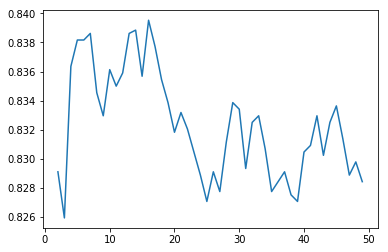

In [80]:
# Variation of the accuracy for each number of features used
plt.plot(res.mean_test_score[2:50])

In [77]:
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_kbest__k', 'param_rf__min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [96]:
# Optimal features used in the model
skb = SelectKBest(k=17)
X_kbest = skb.fit_transform(X, y)
cols = X.columns[skb.get_support()]
cols

Index(['pred_benign', 'pred_normal', 'pred_insitu', 'pred_invasive',
       '2x_V_im_0_entropy', '2x_V_im_0_lochom', '3x_V_im_0_lochom',
       '2x_V_im_135_entropy', '2x_V_im_135_lochom', '3x_V_im_135_lochom',
       '2x_V_im_45_entropy', '2x_V_im_45_lochom', '3x_V_im_45_lochom',
       '2x_V_im_90_entropy', '3x_V_im_90_entropy', '2x_V_im_90_lochom',
       '3x_V_im_90_lochom'],
      dtype='object')

In [92]:
y = df['real']
X = df.drop(['path','image','patch','pred','correct','real','filename','confidence','pred_benign', 'pred_normal', 'pred_insitu', 'pred_invasive'], axis=1)

In [93]:
# Model used
rfc = RandomForestClassifier(n_estimators=200, n_jobs=1)

# K best
pipeline = Pipeline([("kbest", SelectKBest()), ("rf", rfc)])
param_grid = dict(
    kbest__k=np.arange(1, 100),
    rf__min_samples_leaf=[1])
cv_kbest = GridSearchCV(
    pipeline, param_grid=param_grid, cv=5,
    return_train_score=True, n_jobs=-1, verbose=10)
cv_kbest.fit(X, y)
res = pd.DataFrame(cv_kbest.cv_results_)
res.to_hdf("/".join(["results", 'cv_res.h5']), key='kbest_wo_kwok')

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

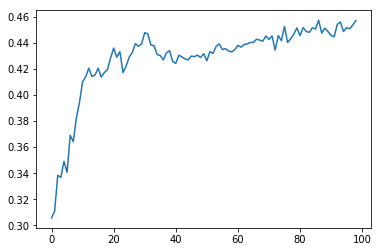

In [94]:
plt.plot(res.mean_test_score)

# First attemps to simple ensembled methods

In [37]:
df_layer = pd.read_hdf('results/pred_kwok.h5', 'last_layer')

FileNotFoundError: File results/pred_kwok.h5 does not exist

In [42]:
df_comp.head()

image  patch pred_Kw  confidence    real pred_Kw_ft  confidence_meta
0     89      5  Benign    0.860668  Benign     Benign         0.978784
1     89     14  Benign    0.920371  Benign     Benign         0.981207
2     89     13  Benign    0.953537  Benign     Benign         0.984918
3     89     11  Benign    0.977115  Benign     Benign         0.990553
4     89      4  Benign    0.978364  Benign     Benign         0.989460

In [43]:
print((df_comp.pred_Kw == df_comp.real).mean())
print((df_comp.pred_Kw_ft == df_comp.real).mean())
p1 = [x['pred_Kw'] if x['confidence'] > x['confidence_meta'] else x['pred_Kw_ft'] for y, x in df_comp.iterrows()]
print((p1 == df_comp.real).mean())

0.8529011786038078
0.8087035358114234
0.8678603807796917


In [44]:
p2 = [x['pred_Kw'] if x['confidence'] + 0.05 > x['confidence_meta'] else x['pred_Kw_ft'] for y, x in df_comp.iterrows()]
print((p2 == df_comp.real).mean())

0.8680870353581143


In [45]:
p3 = [x['pred_Kw'] if (x['confidence'] > x['confidence_meta']) or (x['confidence_meta'] < 0.5) else x['pred_Kw_ft'] for y, x in df_comp.iterrows()]
print((p3 == df_comp.real).mean())

0.8676337262012692


In [46]:
# p3 = pd.DataFrame(p3)
# p3.columns=['pred']
p4 = [x['pred_Kw'] if (x['pred_Kw']=='Invasive') or (x['confidence'] > x['confidence_meta']) else x['pred_Kw_ft'] for y, x in df_comp.iterrows()]
print((p4 == df_comp.real).mean())

0.8653671804170444


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
clases = np.unique(p1)
my_conf_mat = confusion_matrix(df_comp.real, p1, labels=clases)

In [49]:
kwok_conf_mat = confusion_matrix(df_comp.real, df_comp.pred_Kw, labels=clases)

In [50]:
kwok_fts_conf_mat = confusion_matrix(df_comp.real, df_comp.pred_Kw_ft, labels=clases)

In [51]:
comp_conf = my_conf_mat - kwok_conf_mat

In [52]:
df_kwok_conf = pd.DataFrame(kwok_conf_mat, index=clases)
df_kwok_conf.columns = clases
df_kwok_conf

Benign  InSitu  Invasive  Normal
Benign       962     136        59      62
InSitu        28    1055        55      38
Invasive      36      58       777       7
Normal        87      59        24     969

In [53]:
df_my_conf = pd.DataFrame(kwok_fts_conf_mat, index=clases)
df_my_conf.columns = clases
df_my_conf

Benign  InSitu  Invasive  Normal
Benign       997      84        50      88
InSitu        83     980        67      46
Invasive      82     117       655      24
Normal       127      63        13     936

In [54]:
df_my_conf = pd.DataFrame(my_conf_mat, index=clases)
df_my_conf.columns = clases
df_my_conf

Benign  InSitu  Invasive  Normal
Benign      1018      95        49      57
InSitu        33    1057        48      38
Invasive      34      67       768       9
Normal        76      54        23     986

In [55]:
df_comp_conf = pd.DataFrame(comp_conf, index=clases)
df_comp_conf.columns = clases
df_comp_conf

Benign  InSitu  Invasive  Normal
Benign        56     -41       -10      -5
InSitu         5       2        -7       0
Invasive      -2       9        -9       2
Normal       -11      -5        -1      17

In [56]:
p4_conf_mat = confusion_matrix(df_comp.real, p4, labels=clases)
df_p4_conf = pd.DataFrame(p4_conf_mat, index=clases)
df_p4_conf.columns = clases
df_p4_conf

Benign  InSitu  Invasive  Normal
Benign       999      92        74      54
InSitu        33    1048        57      38
Invasive      25      59       785       9
Normal        73      54        26     986

In [58]:
df_bin_real = ['Benign' if x == 'Normal' else 'Invasive' if x == 'InSitu' else x for x in df_comp.real]
df_bin_p4 = ['Benign' if x == 'Normal' else 'Invasive' if x == 'InSitu' else x for x in p4]
bin_mat = confusion_matrix(df_bin_real, df_bin_p4, labels=['Benign','Invasive'])
df_p4_bin_conf = pd.DataFrame(bin_mat, index=['Benign','Invasive'])
df_p4_bin_conf.columns = ['Benign','Invasive']
df_p4_bin_conf

Benign  Invasive
Benign      2112       246
Invasive     105      1949

In [65]:
(np.array(df_bin_real) == np.array(df_bin_p4)).mean()

0.9204442429737081

In [70]:
df_pred_fts.head()

image  patch    pred  confidence_meta    real  confidence  correct
0      3      1  Normal         0.643119  Benign        0.64    False
1      3     10  Benign         0.877821  Benign        0.88     True
2      3     11  Benign         0.852528  Benign        0.85     True
3      3     12  Benign         0.865894  Benign        0.87     True
4      3     13  Benign         0.659764  Benign        0.66     True

In [68]:
# GET THE MAX OF THE MEAN OF EACH CLASS:
# df_comp = df_pred[['image','patch', 'pred_benign', 'pred_normal', 'pred_insitu', 'pred_invasive', 'confidence', 'real']].merge(df_pred_fts[['image','patch', 'pred_benign', 'pred_normal', 'pred_insitu', 'pred_invasive','confidence_meta', 'real']], on=['image','patch','real'],suffixes=['_Kw','_Kw_ft'])
# df_comp

KeyError: "['pred_benign', 'pred_normal', 'pred_invasive', 'pred_insitu'] not in index"